In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap,ListedColormap
import matplotlib.cm as cm
import pandas as pd
import numpy as np

A

In [111]:
#read data

dfT=pd.read_csv('D:/main/1_research/P10_Mobility/p10_aging mobility/new data/census/all_census_data_with_location.csv',
                     usecols=['census_block_group','population_by_age'])

#homo
for key in ['Health Care Services','Grocery and Food Supply','Housing and Real Estate']:
    df_=pd.read_csv('D:/main/1_research/P10_Mobility/p10_aging mobility/results_all_states/allStatesByParentType/homo_supply_demand/'+key+'.csv',
                       usecols=['census_block_group','demand_met_in_local'])
    
    df_=df_.rename(columns={'demand_met_in_local':key+'_accratio5m'})
    dfT=pd.merge(dfT,df_)
dfT['census_block_group']=dfT['census_block_group'].astype(str)
dict_state={'1': 'AL', '2': 'AK', '4': 'AZ', '5': 'AR', '6': 'CA', '8': 'CO', '9': 'CT', '10': 'DE', '11': 'DC', '12': 'FL', '13': 'GA', '15': 'HI', '16': 'ID',
            '17': 'IL', '18': 'IN', '19': 'IA', '20': 'KS', '21': 'KY', '22': 'LA', '23': 'ME', '24': 'MD', '25': 'MA', '26': 'MI', '27': 'MN', '28': 'MS', '29': 'MO',
            '30': 'MT', '31': 'NE', '32': 'NV', '33': 'NH', '34': 'NJ', '35': 'NM', '36': 'NY', '37': 'NC', '38': 'ND', '39': 'OH', '40': 'OK', '41': 'OR', '42': 'PA', 
            '44': 'RI', '45': 'SC', '46': 'SD', '47': 'TN', '48': 'TX', '49': 'UT', '50': 'VT', '51': 'VA', '53': 'WA', '54': 'WV', '55': 'WI', '56': 'WY', '60': 'AS', 
            '66': 'GU', '69': 'MP', '72': 'PR', '74': 'UM', '78': 'VI'}
dfT['state']=dfT.apply(lambda x: dict_state[str(int(x['census_block_group'][0:2]))] if 
                                       len(x['census_block_group'])==12 else dict_state[str(int(x['census_block_group'][0:1]))],
                                       axis=1)

In [112]:
df_census = pd.read_csv('D:/main/1_research/P10_Mobility/p10_aging mobility/new data/census/all_census_data_with_location.csv')

In [43]:
df_census

,Unnamed: 0,census_block_group,county,state,population_by_age,above_65,above_50,percent_above_65,percent_above_50,location,median_income_normalized by 250000,percent_undergraduate or higher,percent_minority
0,0,10010201001,01001,1,745,27,242,0.036242,0.324832,"(32.4658291, -86.4896143)",2.000000,0.009396,0.214765
1,1,10010201002,01001,1,1265,145,468,0.114625,0.369960,"(32.4858487, -86.4896898)",0.311252,0.032411,0.143874
2,2,10010202001,01001,1,960,155,318,0.161458,0.331250,"(32.4800823, -86.4749744)",0.100716,0.030208,0.623958
3,3,10010202002,01001,1,1236,117,305,0.094660,0.246764,"(32.464435, -86.4697659)",0.180416,0.049353,0.502427
4,4,10010203001,01001,1,2364,317,665,0.134095,0.281303,"(32.480175, -86.4607925)",0.220888,0.030457,0.373519
...,...,...,...,...,...,...,...,...,...,...,...,...,...
220328,220328,721537506011,72153,72,921,209,467,0.226927,0.507058,"(18.0168168, -66.8320483)",0.052684,0.041260,0.183496
220329,220329,721537506012,72153,72,2703,291,840,0.107658,0.310766,"(18.0164584, -66.8489758)",0.097232,0.116167,0.174991
220330,220330,721537506013,72153,72,1195,69,243,0.057741,0.203347,"(18.0198568, -66.8564698)",0.162500,0.096234,0.092050
220331,220331,721537506021,72153,72,2005,442,968,0.220449,0.482793,"(18.0105276, -66.8667981)",0.036024,0.039900,0.171072


In [113]:
df_census['census_block_group']=df_census['census_block_group'].astype('str')
df_census['county']=df_census['county'].astype('str')
df_census['county']=df_census.apply(lambda x: '0'+x['county'] if len(x['county'])<5 else x['county'], axis=1)

In [41]:
dfT=dfT.drop('county_x', axis=1) 
dfT=dfT.drop('county_y', axis=1) 

In [115]:
df_census['census_block_group']=df_census['census_block_group'].astype('int64')
dfT['census_block_group']=dfT['census_block_group'].astype('int64')
dfT=pd.merge(dfT,df_census[['census_block_group','county']],on='census_block_group')

In [135]:
dfT

,census_block_group,population_by_age,Health Care Services_accratio5m,Grocery and Food Supply_accratio5m,Housing and Real Estate_accratio5m,state,county
0,10010201001,745,0.574468,0.786667,0.625000,AL,01001
1,10010201002,1265,0.280000,0.443709,0.286689,AL,01001
2,10010202001,960,0.655172,0.809524,0.694611,AL,01001
3,10010202002,1236,0.666667,0.702128,0.741007,AL,01001
4,10010203001,2364,0.292135,0.696629,0.438953,AL,01001
...,...,...,...,...,...,...,...
220328,721537506011,921,0.000000,1.000000,0.615385,PR,72153
220329,721537506012,2703,0.181818,0.666667,0.257143,PR,72153
220330,721537506013,1195,0.000000,1.000000,0.200000,PR,72153
220331,721537506021,2005,2.000000,2.000000,0.277778,PR,72153


In [117]:
dfT[dfT['state']=='CA']['county'].unique()

array(['06001', '06003', '06005', '06007', '06009', '06011', '06013',
       '06015', '06017', '06019', '06021', '06023', '06025', '06027',
       '06029', '06031', '06033', '06035', '06037', '06039', '06041',
       '06043', '06045', '06047', '06049', '06051', '06053', '06055',
       '06057', '06059', '06061', '06063', '06065', '06067', '06069',
       '06071', '06073', '06075', '06077', '06079', '06081', '06083',
       '06085', '06087', '06089', '06091', '06093', '06095', '06097',
       '06099', '06101', '06103', '06105', '06107', '06109', '06111',
       '06113', '06115'], dtype=object)

In [118]:
city_county_fips = {
    # 佛罗里达州（Florida）
    'Miami': '12086',  # 迈阿密-戴德县
    'Palm Beach': '12099',  # 帕尔姆比奇县     
    # AZ州（Arizona）
    "Phoenix": "04013",  # Maricopa County
    "Tucson": "04019",   # Pima County

    # 加利福尼亚州（California）
    'Los Angeles':"06037",  # 洛杉矶县
    'San Diego': '06073',  # 圣迭戈县
    }
county_list=list(city_county_fips.values())

In [48]:
for ct in county_list:

    print(ct,sum(dfT[dfT['county']==ct]['is_old']),len(dfT[dfT['county']==ct]),sum(dfT[dfT['county']==ct]['is_old'])/len(dfT[dfT['county']==ct]))

12086 15 1594 0.009410288582183186
12099 172 886 0.19413092550790068
04013 173 2505 0.069061876247505
04019 34 630 0.05396825396825397
06037 11 6425 0.0017120622568093384
06073 18 1795 0.010027855153203343


In [136]:
df_city=dfT[dfT['county'].isin(county_list)]

dict=city_county_fips 
def get_key(value):
    return [k for k,v in city_county_fips.items() if v==value][0]
df_city['city']=df_city.apply(lambda x: get_key(x['county']),axis=1)

C:\Users\Linao\AppData\Local\Temp\ipykernel_39328\3096982532.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city['city']=df_city.apply(lambda x: get_key(x['county']),axis=1)


In [138]:
df_city[df_city['population_by_age']>0]

,census_block_group,population_by_age,Health Care Services_accratio5m,Grocery and Food Supply_accratio5m,Housing and Real Estate_accratio5m,state,county,city
4331,40130101011,1497,0.000000,0.000000,0.004049,AZ,04013,Phoenix
4332,40130101012,2100,0.000000,0.000000,0.000000,AZ,04013,Phoenix
4333,40130101013,1189,0.076923,0.000000,0.000000,AZ,04013,Phoenix
4334,40130101021,1026,0.000000,0.000000,0.000000,AZ,04013,Phoenix
4335,40130101022,1542,0.000000,0.050000,0.091040,AZ,04013,Phoenix
...,...,...,...,...,...,...,...,...
49411,120990082032,1399,0.259259,0.671533,0.359756,FL,12099,Palm Beach
49412,120990082033,1385,0.388889,0.795082,0.255474,FL,12099,Palm Beach
49413,120990083011,1532,0.000000,0.029412,0.000000,FL,12099,Palm Beach
49414,120990083021,1206,0.431818,0.711712,0.267148,FL,12099,Palm Beach


In [12]:
prepath='D:/main/1_research/P10_Mobility/p10_aging mobility/results_all_states/allStatesByParentType/'

In [101]:
df_city.to_csv(prepath+'cityCountyLevelAnalysis/6cities_accratio5m_HGH.csv')  

FairIndex

In [3]:
prepath='D:/main/1_research/P10_Mobility/p10_aging mobility/results_all_states/allStatesByParentType/'
df_city=pd.read_csv(prepath+'cityCountyLevelAnalysis/6cities_accratio5m_HGH.csv')  

In [4]:
df_city['county']=df_city['county'].astype(str)
df_city['county']=df_city.apply(lambda x: '0'+ x['county'] if len(x['county'])==4 else x['county'],axis=1)

In [7]:
df_city['county_name']=df_city.apply(lambda x: county_dict[x['county']],axis=1)

In [8]:
abb_dict={'Health Care Services':'HCS','Grocery and Food Supply':'GFS', 'Housing and Real Estate':'HRE'}
homoDD13C=[]

for key in abb_dict.keys():  
    df_city=df_city[df_city[key+'_accratio5m']<1.1]

In [6]:
city_county_fips = {
    # 佛罗里达州（Florida）
    'Miami': '12086',  # 迈阿密-戴德县
    'Palm Beach': '12099',  # 帕尔姆比奇县     
    # AZ州（Arizona）
    "Phoenix": "04013",  # Maricopa County
    "Tucson": "04019",   # Pima County

    # 加利福尼亚州（California）
    'Los Angeles':"06037",  # 洛杉矶县
    'San Diego': '06073',  # 圣迭戈县
    }
county_dict = {
    # 佛罗里达州（Florida）
    '12086':'Miami-Dade',  # 迈阿密-戴德县
    '12099':'Palm Beach' ,  # 帕尔姆比奇县     
    # AZ州（Arizona）
     "04013":'Maricopa',  # Maricopa County
    "04019":'Pima',   # Pima County

    # 加利福尼亚州（California）
    "06037":'Los Angeles',  # 洛杉矶县
    '06073':'San Diego'  # 圣迭戈县
    }

In [9]:
df_city

,Unnamed: 0,census_block_group,population_by_age,percent_above_65,Health Care Services_accratio5m,Grocery and Food Supply_accratio5m,Housing and Real Estate_accratio5m,state,age,is_old,county,city,county_name
0,4331,40130101011,1497,0.077488,0.000000,0.000000,0.004049,AZ,less than or equal to 0.5,0,04013,Phoenix,Maricopa
1,4332,40130101012,2100,0.392381,0.000000,0.000000,0.000000,AZ,less than or equal to 0.5,0,04013,Phoenix,Maricopa
2,4333,40130101013,1189,0.852817,0.076923,0.000000,0.000000,AZ,greater than 0.5,1,04013,Phoenix,Maricopa
3,4334,40130101021,1026,0.313840,0.000000,0.000000,0.000000,AZ,less than or equal to 0.5,0,04013,Phoenix,Maricopa
4,4335,40130101022,1542,0.512322,0.000000,0.050000,0.091040,AZ,greater than 0.5,1,04013,Phoenix,Maricopa
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13826,49414,120990083021,1206,0.106136,0.431818,0.711712,0.267148,FL,less than or equal to 0.5,0,12099,Palm Beach,Palm Beach
13827,49415,120990083022,4622,0.065989,0.333333,0.635036,0.343066,FL,less than or equal to 0.5,0,12099,Palm Beach,Palm Beach
13828,49416,120999800001,0,0.000000,0.200000,0.235294,0.258065,FL,less than or equal to 0.5,0,12099,Palm Beach,Palm Beach
13830,49418,120999802001,0,0.000000,0.000000,0.000000,0.000000,FL,less than or equal to 0.5,0,12099,Palm Beach,Palm Beach


In [11]:
import numpy as np
abb_dict={'Health Care Services':'HCS','Grocery and Food Supply':'GFS', 'Housing and Real Estate':'HRE'}

for key in abb_dict.keys():  
    sum_y_med=0
    sum_o_med=0
    sum_med=0
    for county in county_dict.values():
        #print(county)
        y_med=np.median(df_city[(df_city['county_name']==county)&(df_city['age']!='greater than 0.5')][key+'_accratio5m'])
        o_med=np.median(df_city[(df_city['county_name']==county)&(df_city['age']=='greater than 0.5')][key+'_accratio5m'])
        med=np.median(df_city[(df_city['county_name']==county)][key+'_accratio5m'])
        print (key,y_med,o_med,county)
        

Health Care Services 0.49851113808430186 0.6147954041523886 Miami-Dade
Health Care Services 0.4980734747106507 0.5714285714285714 Palm Beach
Health Care Services 0.422048611111111 0.5 Maricopa
Health Care Services 0.4889355516071717 0.39871794871794874 Pima
Health Care Services 0.5 0.5245901639344263 Los Angeles
Health Care Services 0.4210526315789473 0.5 San Diego
Grocery and Food Supply 0.7011112321603661 0.7411622276029055 Miami-Dade
Grocery and Food Supply 0.6438356164383562 0.7 Palm Beach
Grocery and Food Supply 0.64 0.6559139784946236 Maricopa
Grocery and Food Supply 0.6639318885448916 0.42009400705052874 Pima
Grocery and Food Supply 0.6962025316455697 0.5454545454545454 Los Angeles
Grocery and Food Supply 0.6888888888888889 0.6363636363636364 San Diego
Housing and Real Estate 0.5851457840819543 0.7571825205214872 Miami-Dade
Housing and Real Estate 0.6086193947426553 0.6652542372881356 Palm Beach
Housing and Real Estate 0.5790911705493241 0.6182795698924731 Maricopa
Housing and R

In [170]:
abb_dict={'Health Care Services':'HCS','Grocery and Food Supply':'GFS', 'Housing and Real Estate':'HRE'}
homoDD13C=[]

for key in abb_dict.keys():   
    for county in county_list:
        df_st=df_city[(df_city['county']==county)&(df_city[key+'_accratio5m']<=1) ]
        numold=sum(df_st['is_old'])
        if numold>0:
            sumfair=0
            for i in range(9):
                thres = np.percentile(df_st[(df_st['age']!='greater than 0.5')&(df_st[key+'_accratio5m']<=1)][key+'_accratio5m'],i*10+10) 
                numGood = len(df_st[(df_st[key+'_accratio5m']>=thres)&(df_st['age']=='greater than 0.5')&(df_st[key+'_accratio5m']<=1)])                         
                fairindex = numGood/numold-(1-(i*10+10)/100)
                sumfair += fairindex
            FairIndex = sumfair/4.5
            homoDD13C.append((key,county,county_dict[county],FairIndex,'5 miles'))

homoDD13Cdf=pd.DataFrame(homoDD13C,columns=['parentType','county','county_name','FairIndex','coverage'])

In [171]:
homoDD13Cdf

,parentType,county,county_name,FairIndex,coverage
0,Health Care Services,12086,Miami-Dade,0.365079,5 miles
1,Health Care Services,12099,Palm Beach,0.324237,5 miles
2,Health Care Services,04013,Maricopa,0.225471,5 miles
3,Health Care Services,04019,Pima,-0.078431,5 miles
4,Health Care Services,06037,Los Angeles,0.111111,5 miles
5,Health Care Services,06073,San Diego,0.111111,5 miles
6,Grocery and Food Supply,12086,Miami-Dade,0.174603,5 miles
7,Grocery and Food Supply,12099,Palm Beach,0.217674,5 miles
8,Grocery and Food Supply,04013,Maricopa,0.083821,5 miles
9,Grocery and Food Supply,04019,Pima,-0.490196,5 miles


In [152]:
homoDD13Cdf.to_csv(prepath+'cityCountyLevelAnalysis/6counties_fairindex5m_HGH.csv')  

小提琴图中的四分位数线数量为： 36
小提琴图中的四分位数线数量为： 36
小提琴图中的四分位数线数量为： 36


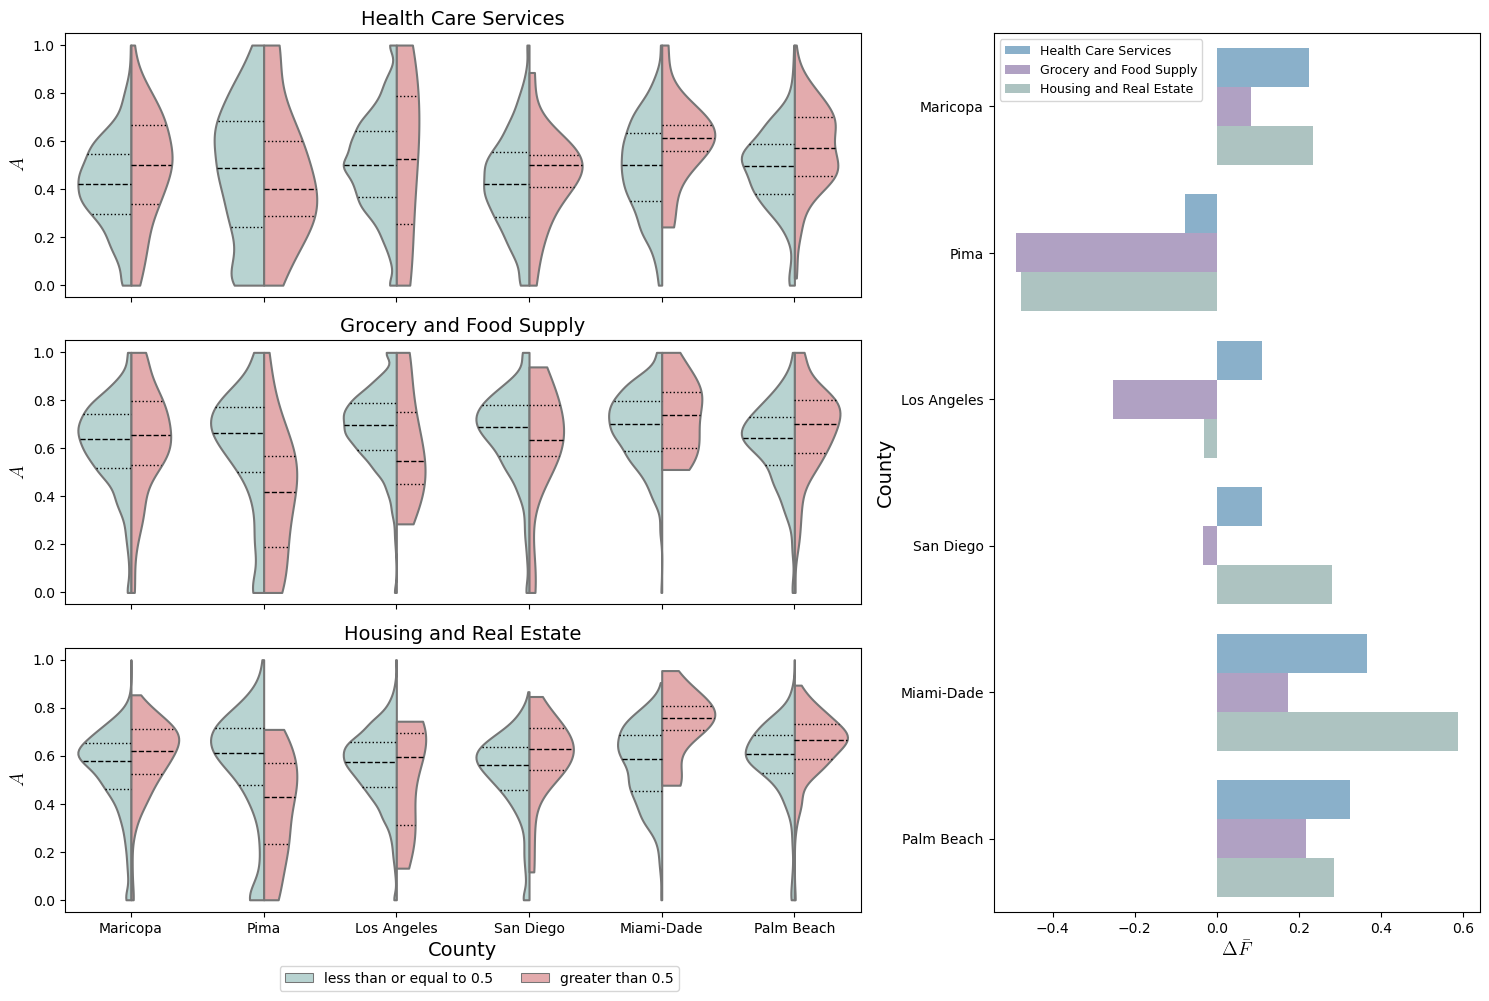

In [173]:
import matplotlib.gridspec as gridspec
#plot

fig=plt.figure(figsize=(15, 10))

gs=gridspec.GridSpec(3,5)

ax=[]
for i in range(3):
    ax.append(plt.subplot(gs[i,0:3]))
ax.append(plt.subplot(gs[:,3:5]))

abb_dict={'Health Care Services':'HCS','Grocery and Food Supply':'GFS', 'Housing and Real Estate':'HRE'}


colors={'less than or equal to 0.5':'#B3D8D5','greater than 0.5': '#EDA1A4'}

df_city['age']=df_city.apply(lambda x: 'greater than 0.5'if x['is_old']==1 else 'less than or equal to 0.5',axis=1)

#sn.legend(title='',fontsize='small',loc='upper right')
for i,key in enumerate(abb_dict.keys()):
    df_city=df_city[df_city[key+'_accratio5m']<1.1]
    sn=sns.violinplot(x='county_name',y=key+'_accratio5m',hue='age',data=df_city,ax=ax[i],palette=colors,cut=0.0,
                      inner="quartiles",split=True)
    sn.set_title(key,fontsize=14)

    # 获取四分位数线
    quartile_lines = [line for line in ax[i].lines if line.get_linestyle() == '--']

    # 输出四分位数线的个数
    print("小提琴图中的四分位数线数量为：", len(quartile_lines))
    # 设置四分位数线的颜色、粗细和样式
    for k,line in enumerate(quartile_lines):
        if k%3==1:
            line.set_color('black')  # 设置颜色为红色
            line.set_linewidth(1)  # 设置线条粗细为2
            line.set_linestyle('--')  # 设置线条样式为点状线
        else:
            line.set_color('black')  # 设置颜色为红色
            line.set_linewidth(1)  # 设置线条粗细为2
            line.set_linestyle(':')  # 设置线条样式为点状线
    
    sn.set_ylabel(r'$A$', fontsize=14, usetex=True)
    if i<2:
        sn.legend('',frameon=False)
        sn.set_xlabel('')
        ax[i].set_xticklabels([])
        #ax[i].tick_params(axis='y', which='both', bottom=True, left=True)  # 设置x y轴标签大小
    else:
        sn.legend(title='',ncol=2,loc=(0.27,-0.3),fontsize=10)
        sn.set_xlabel('County',fontsize=14)
        ax[i].tick_params(axis='both', which='both', bottom=True, left=True)  # 设置x y轴标签大小
       
    citylist=list(df_city['county_name'].unique())
        
    #ax[i].axhline(y=0.5, color='red', linestyle='-',linewidth=0.8)
    
type_color_dict={'Health Care Services':'#7FB2D5','Grocery and Food Supply':'#AF9BC9', 'Housing and Real Estate':'#A9C7C4'}
sns.barplot(y='county_name',x='FairIndex',hue='parentType',data=homoDD13Cdf.set_index('county_name').loc[citylist].reset_index(),
            palette=type_color_dict,ax=ax[3])
ax[3].legend(title=None,loc='upper left',fontsize=9)

ax[3].set_ylabel('County',fontsize=14)
ax[3].set_xlabel(r'$\Delta \bar F$',usetex=True,fontsize=14)
ax[3].tick_params(axis='both', which='both', bottom=True, left=True)  # 设置x y轴标签大小
fig.tight_layout()

In [174]:
fig.savefig(prepath+'cityCountyLevelAnalysis/A_fairindex_HGH_6county.jpg',dpi=600)  